In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
file_path = r'./data.xlsx'  

try:
    df_sheets = pd.read_excel(file_path, sheet_name=None) 
except Exception as e:
    print(f"Error loading Excel file: {e}")
    exit()

In [3]:
df_no14wt = df_sheets['No.14WT']
df_no2wt = df_sheets['No.2WT']
df_no3 = df_sheets['No.3']
df_no39wt = df_sheets['No.39WT']

In [4]:
print("No.14WT DataFrame:")
print(df_no14wt.head())
print("\nNo.2WT DataFrame:")
print(df_no2wt.head())
print("\nNo.3 DataFrame:")
print(df_no3.head())
print("\nNo.39WT DataFrame:")
print(df_no39wt.head())

No.14WT DataFrame:
         1         2          3          4         5          6          7   \
0  0.170386 -0.010933  76.797684  76.298622  0.021913  88.994217  89.271492   
1 -0.255579 -0.054663  76.797691  76.286621  0.021913  88.898232  89.124474   
2  0.106491  0.032798  76.797691  76.276619  0.021913  88.798195  89.072472   
3  0.085193 -0.076529  76.797691  76.198639  0.021913  88.624199  88.998489   
4 -0.191684 -0.021865  76.797691  76.198639  0.021913  88.598190  88.798485   

          8           9    10  ...          18         19         20  \
0  89.298538  25987527.0  0.0  ...  691.260254  49.950001  35.626331   
1  89.201553  25987527.0  0.0  ...  691.859497  49.950001  35.600330   
2  89.098526  25987527.0  0.0  ...  692.159180  49.939999  35.626335   
3  88.998550  25987527.0  0.0  ...  692.458801  49.950001  35.647339   
4  88.898575  25987527.0  0.0  ...  693.357666  49.950001  35.651337   

          21         22         23        24         25         26       

In [5]:
for name, df in zip(['No.14WT', 'No.2WT', 'No.3', 'No.39WT'], [df_no14wt, df_no2wt, df_no3, df_no39wt]):
    print(f"\nSummary Statistics for {name}:")
    print(df.describe())


Summary Statistics for No.14WT:
               1           2           3           4            5   \
count  686.000000  686.000000  686.000000  686.000000   686.000000   
mean    -0.009352   -0.008211   50.847814   51.691330   201.143305   
std      0.040680    0.063981   22.980504   21.275023   215.402219   
min     -0.255579   -0.238556    8.225802    6.741785     0.021913   
25%     -0.031947   -0.043731   27.100220   29.700348     0.021913   
50%     -0.010649   -0.010843   67.497543   67.348495     0.032577   
75%      0.010701    0.032530   73.868010   72.059835   427.937759   
max      0.170386    0.249400   76.797691   76.298622  1021.722295   

               6           7           8             9            10  ...  \
count  686.000000  686.000000  686.000000  6.850000e+02   686.000000  ...   
mean    59.395691   59.242286   59.315670  2.483223e+07   203.845205  ...   
std     17.525076   17.585124   17.490491  1.206706e+06   219.203161  ...   
min     41.098034   40.99573

In [6]:
for name, df in zip(['No.14WT', 'No.2WT', 'No.3', 'No.39WT'], [df_no14wt, df_no2wt, df_no3, df_no39wt]):
    missing_values_df = pd.DataFrame({'Column': df.columns, 'Missing Values': df.isnull().sum()})
    print(f"\nMissing Values in {name}:")
    print(missing_values_df)


Missing Values in No.14WT:
    Column  Missing Values
1        1               0
2        2               0
3        3               0
4        4               0
5        5               0
6        6               0
7        7               0
8        8               0
9        9               1
10      10               0
11      11               0
12      12               0
13      13               0
14      14               0
15      15               0
16      16               0
17      17               0
18      18               0
19      19               0
20      20               0
21      21               0
22      22               0
23      23               0
24      24               0
25      25               0
26      26               0
27      27               0

Missing Values in No.2WT:
    Column  Missing Values
1        1               0
2        2               0
3        3               0
4        4               0
5        5               0
6        6               0


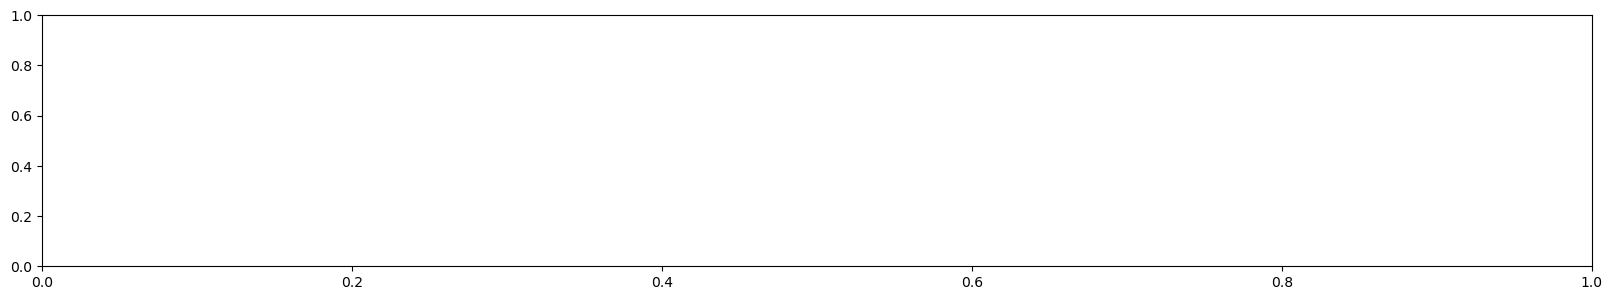

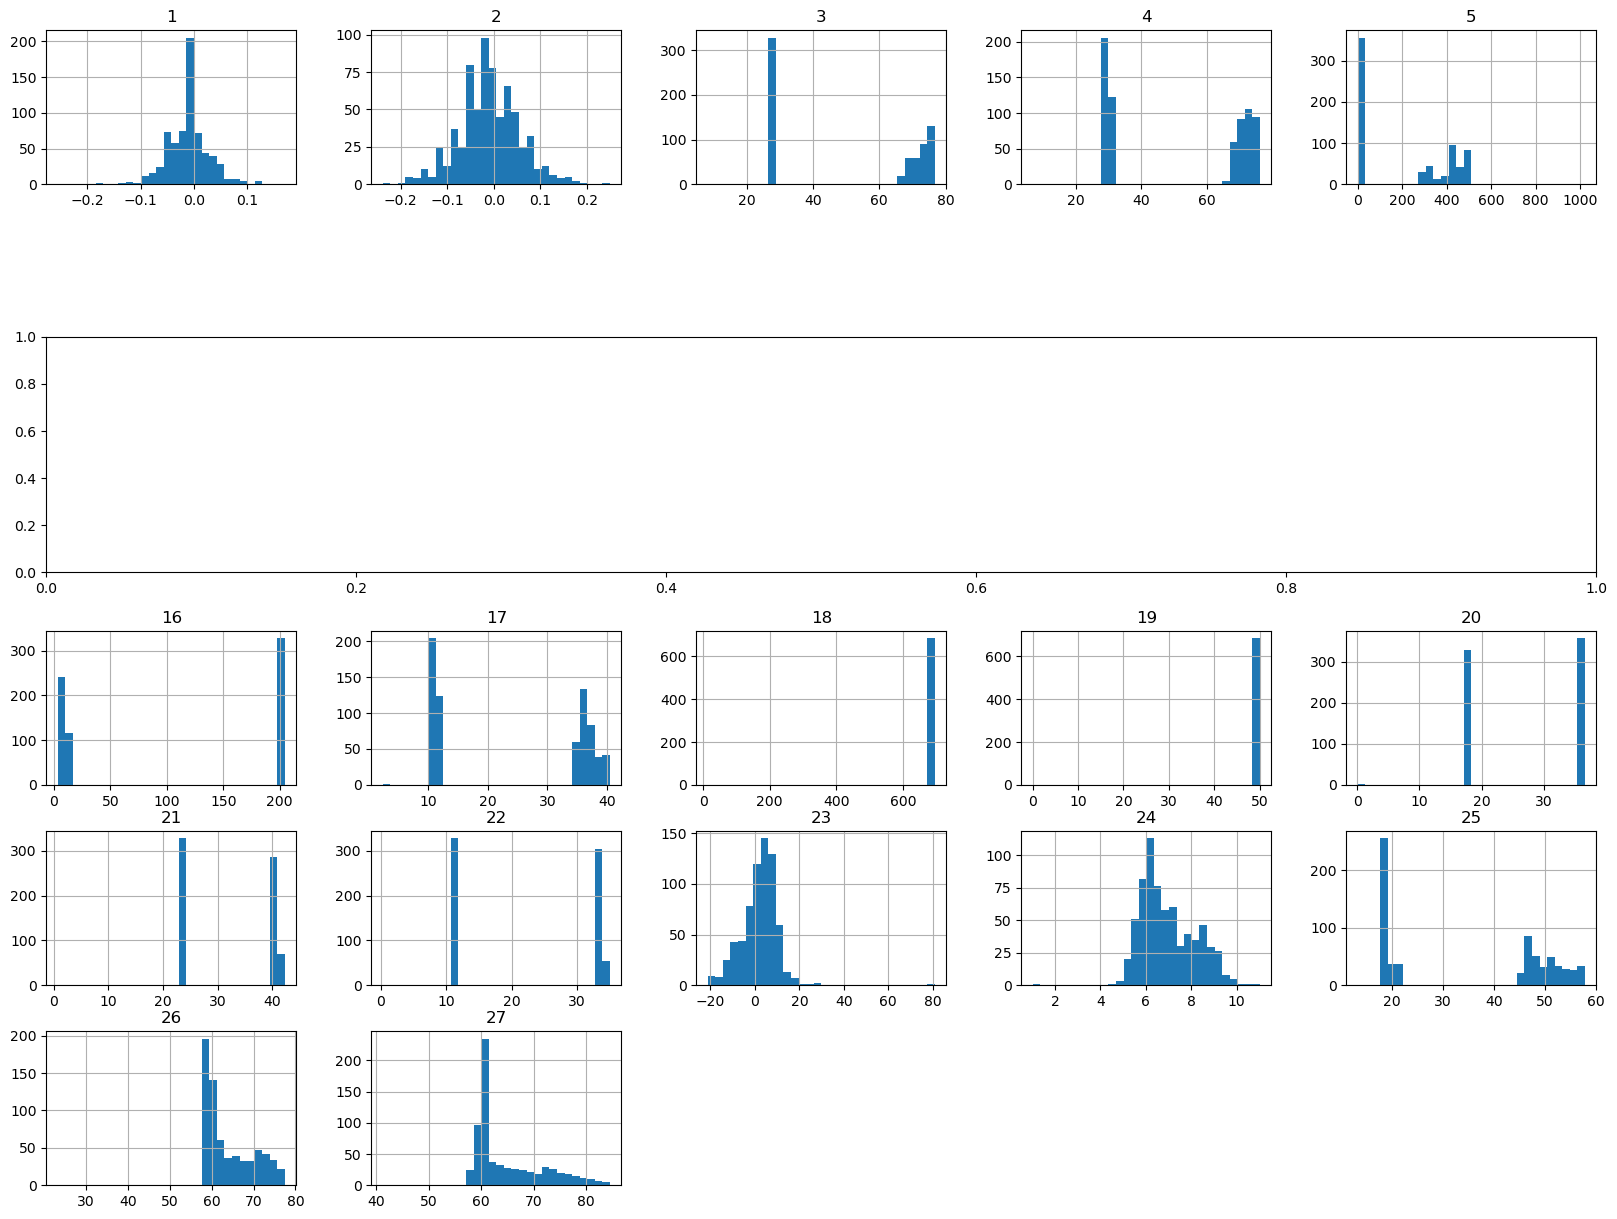

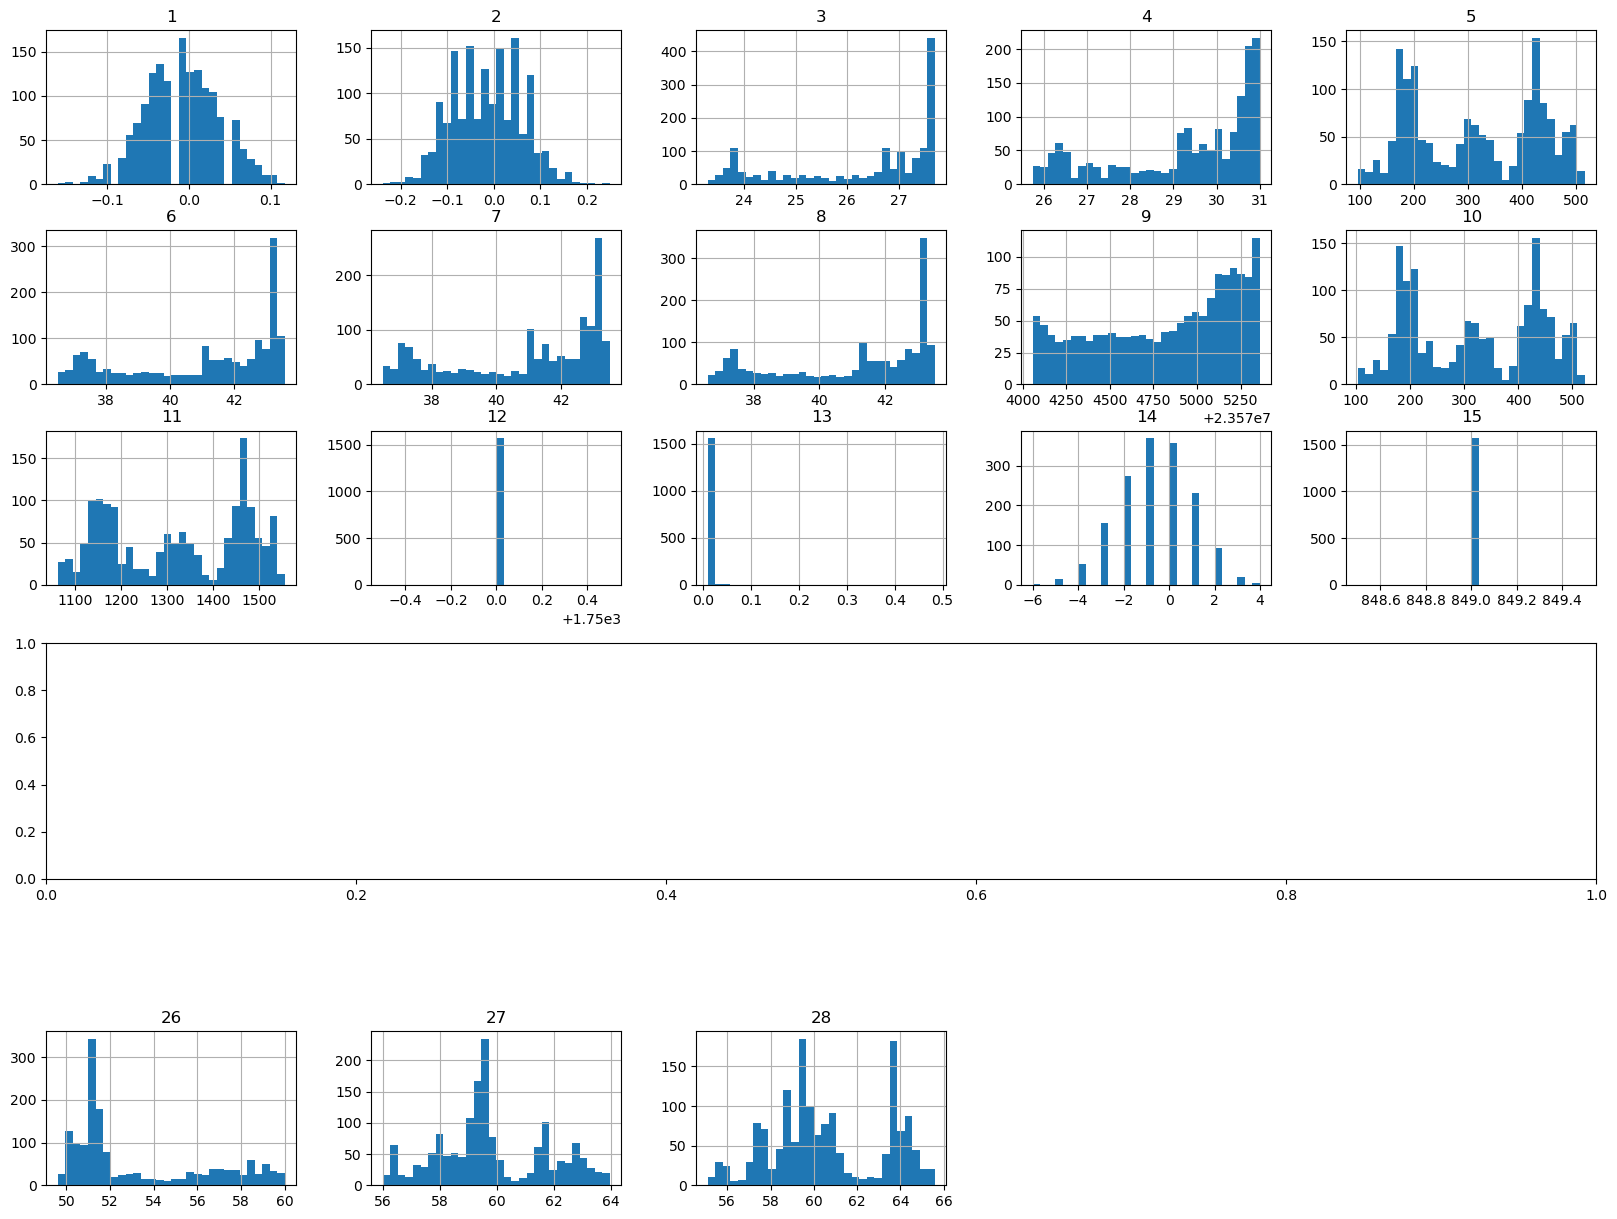

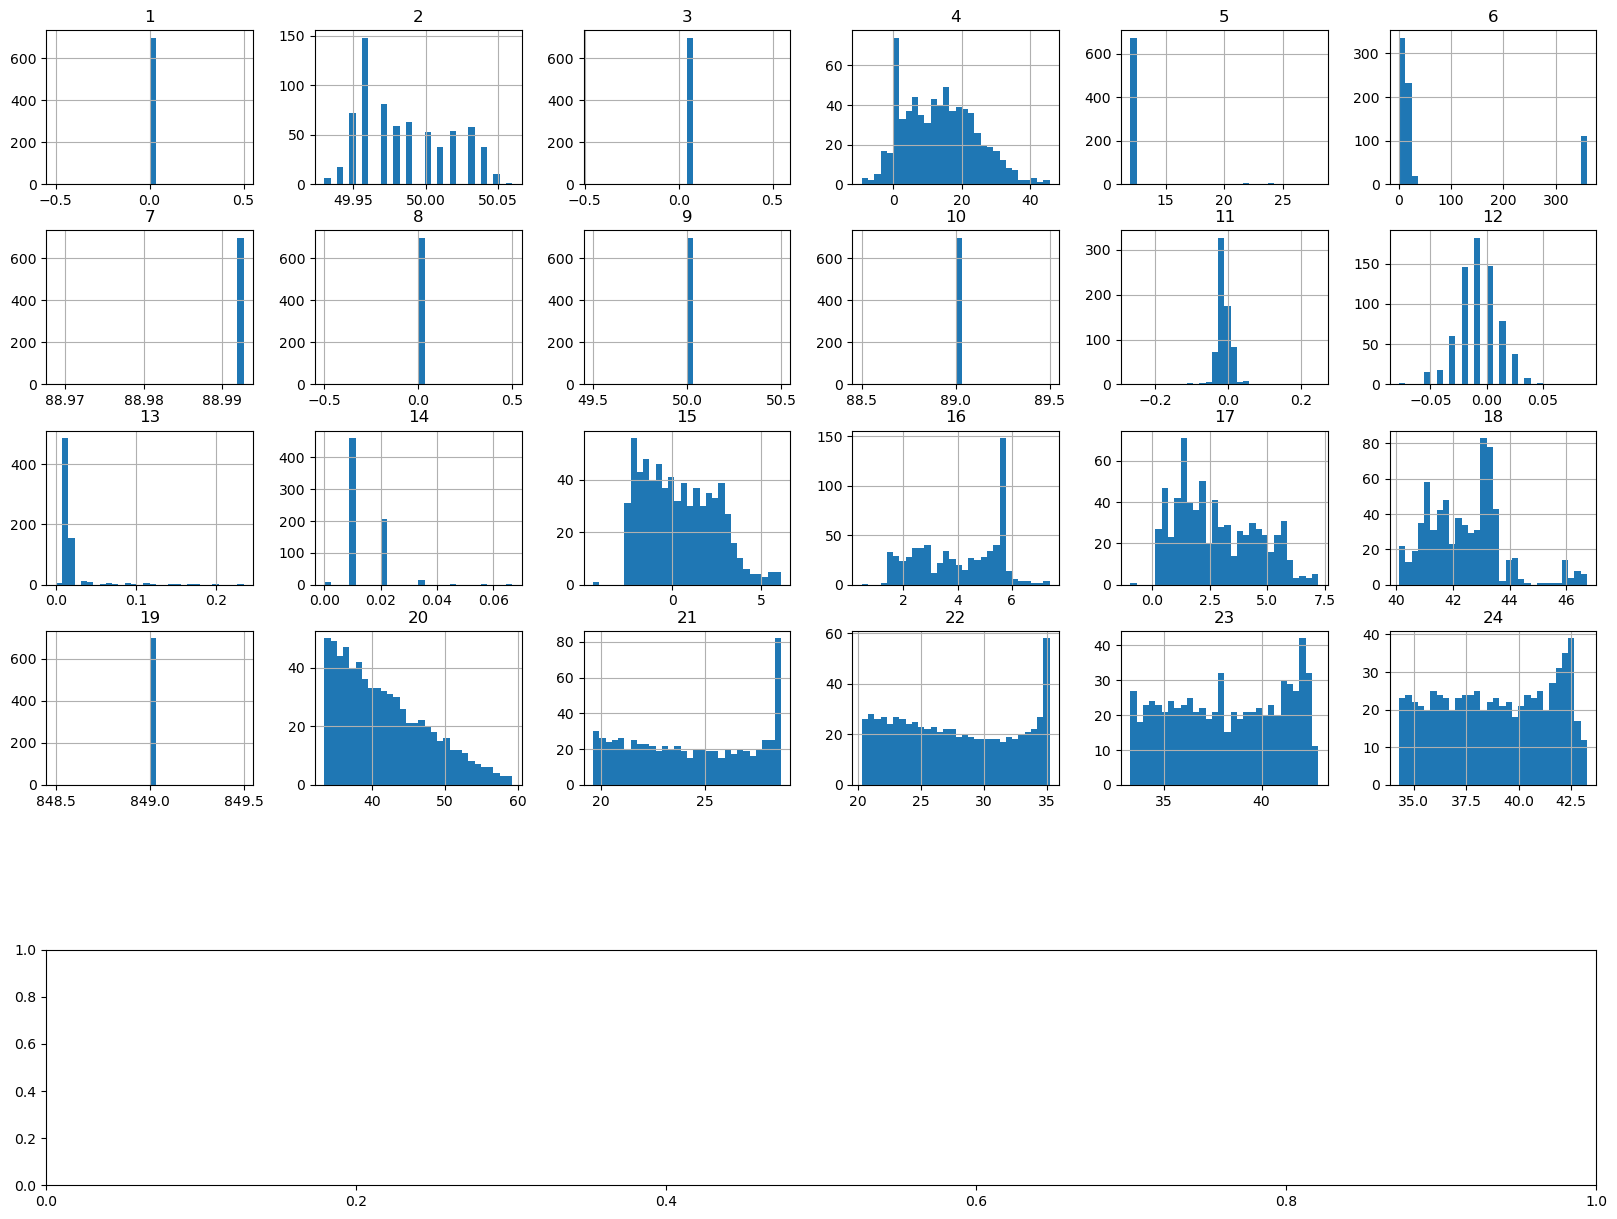

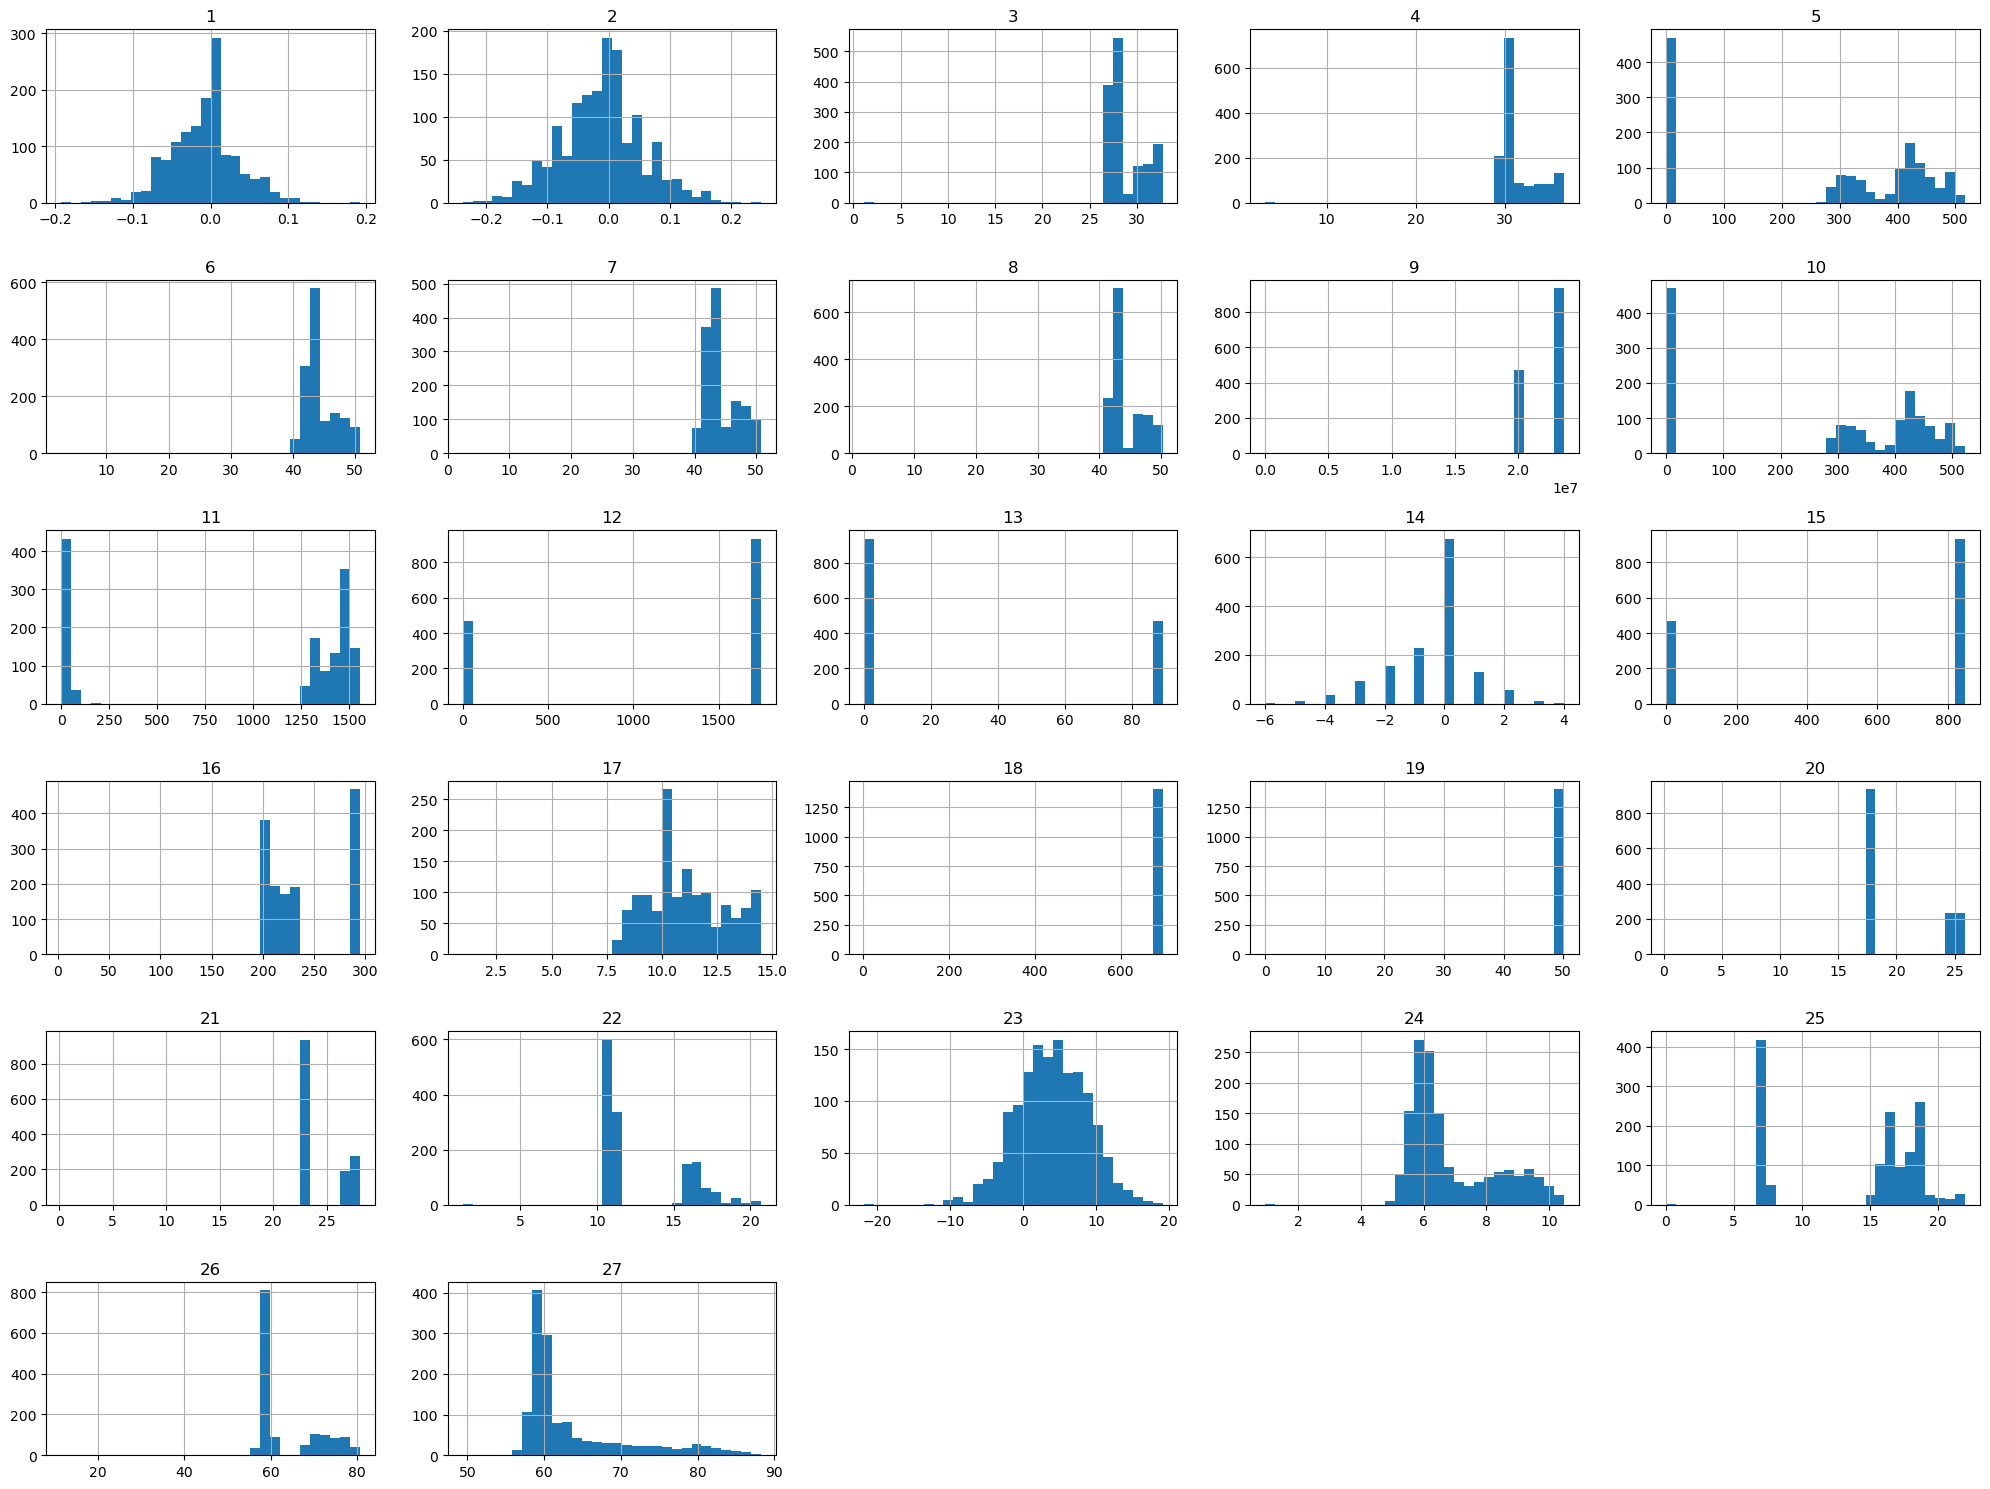

In [7]:
plt.figure(figsize=(20, 15))
for i, df in enumerate([df_no14wt, df_no2wt, df_no3, df_no39wt]):
    plt.subplot(4, 1, i + 1)
    df.hist(bins=30, figsize=(20, 15))
    plt.title(f'Feature Distribution for {["No.14WT", "No.2WT", "No.3", "No.39WT"][i]}', fontsize=22)
plt.tight_layout()
plt.show()

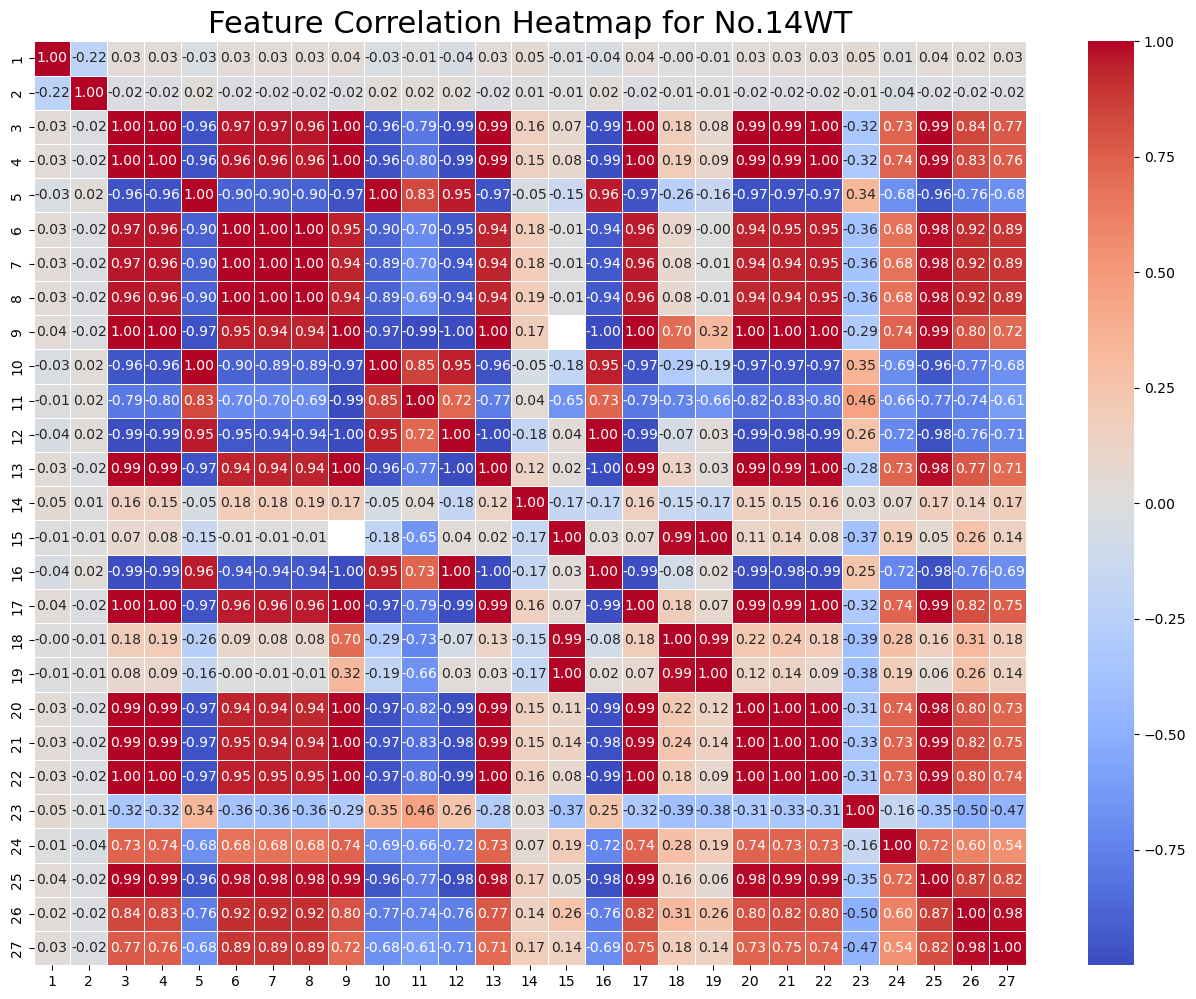

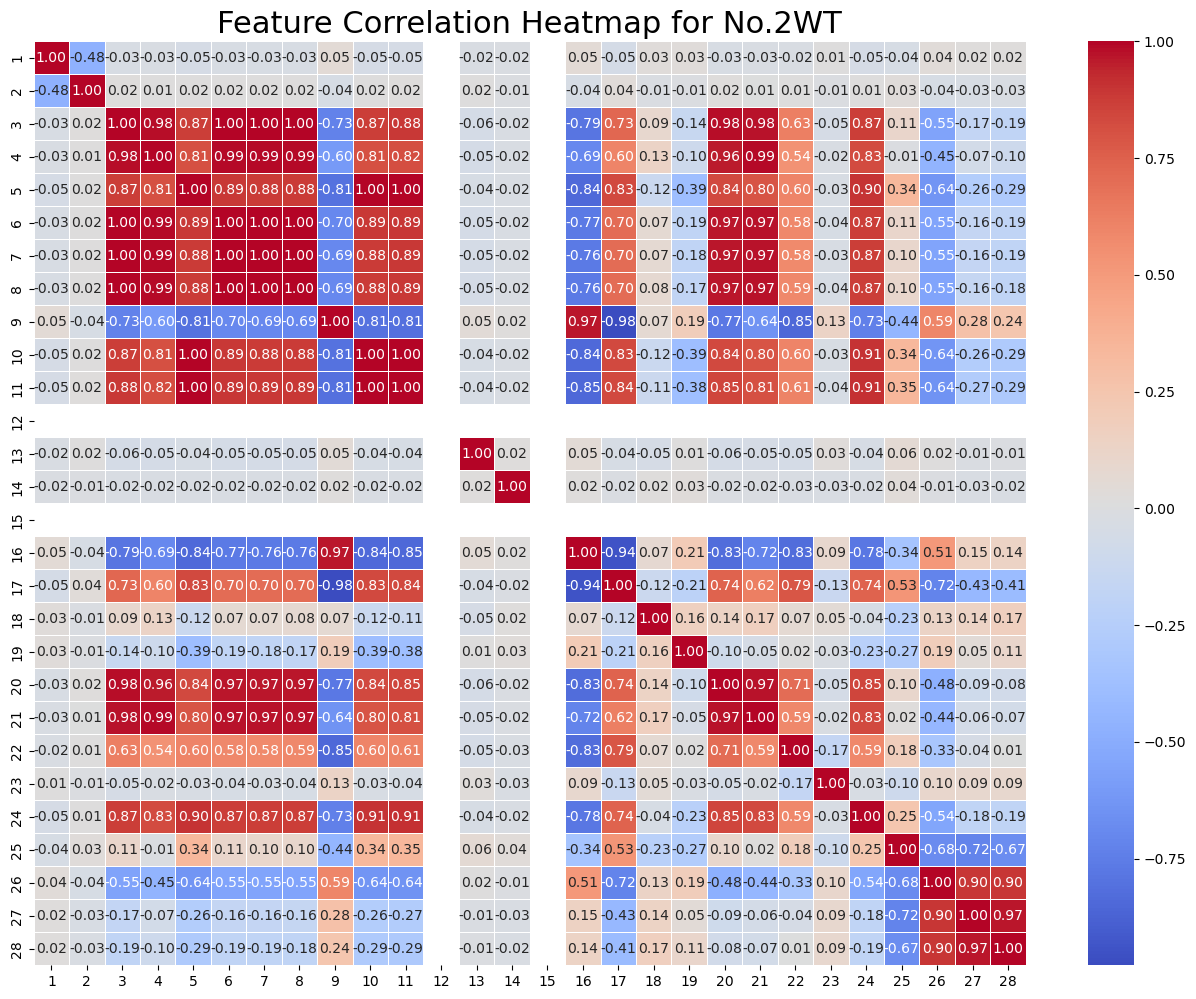

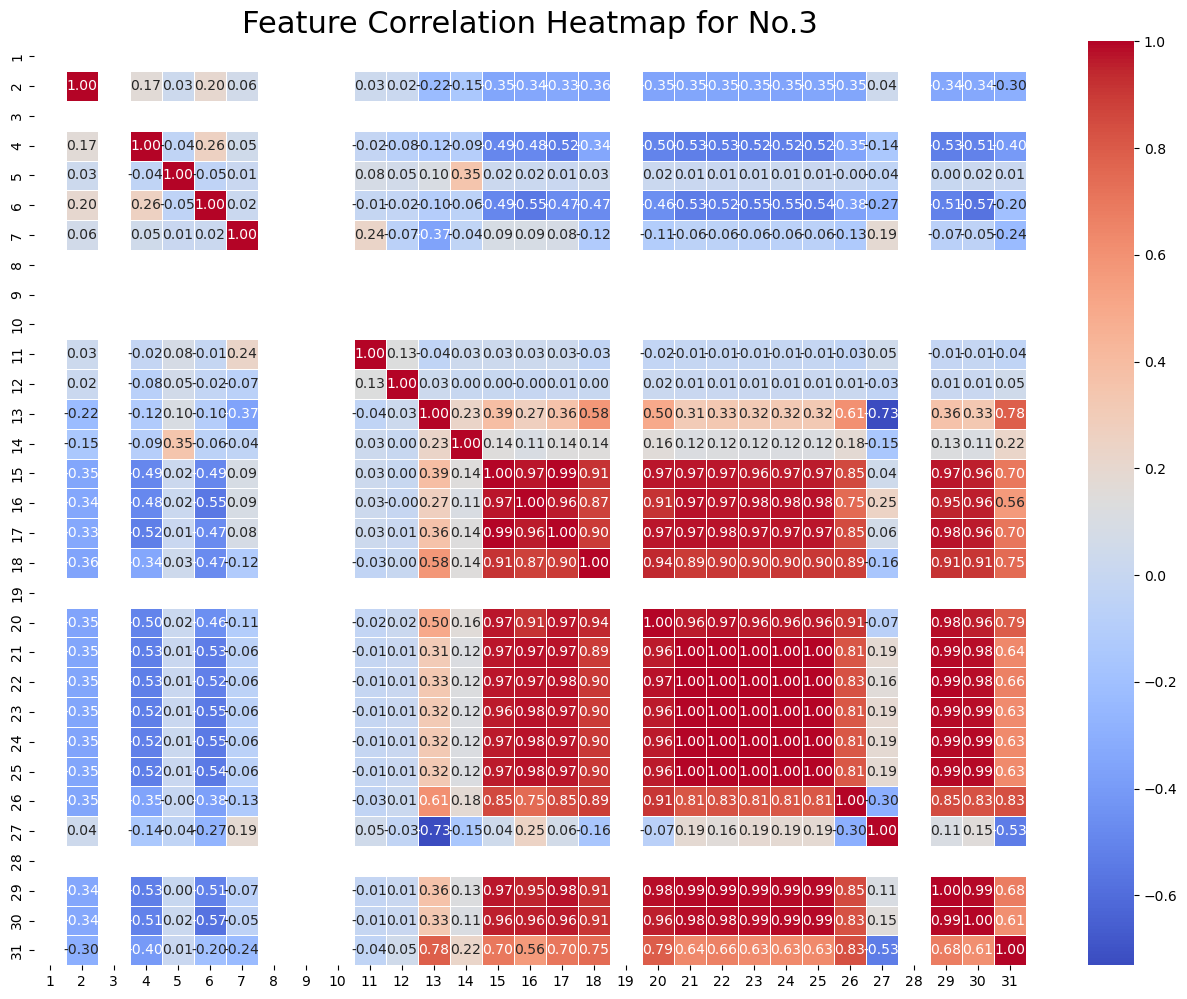

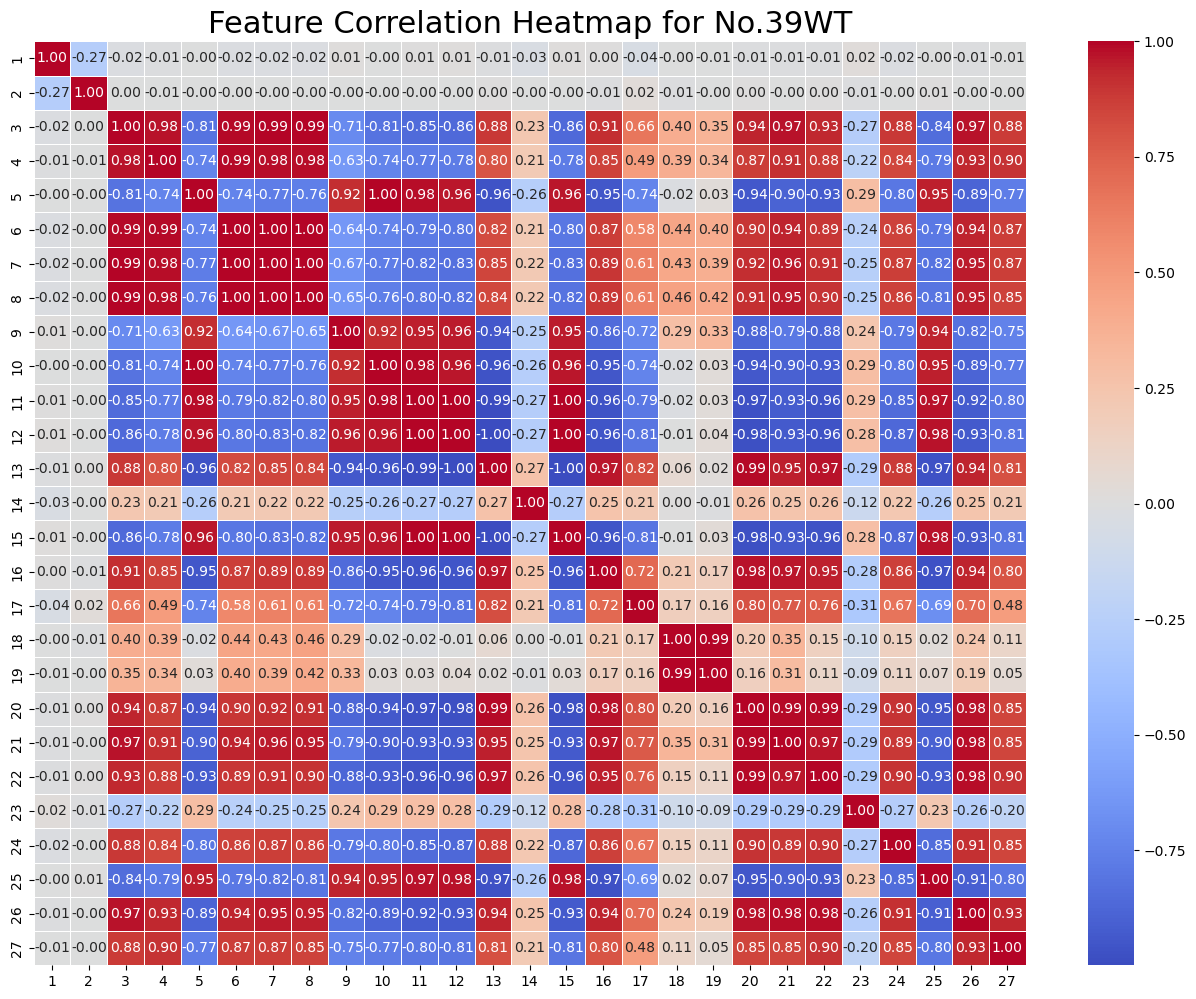

In [8]:
for name, df in zip(['No.14WT', 'No.2WT', 'No.3', 'No.39WT'], [df_no14wt, df_no2wt, df_no3, df_no39wt]):
    plt.figure(figsize=(16, 12))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Feature Correlation Heatmap for {name}', fontsize=22)
    plt.show()

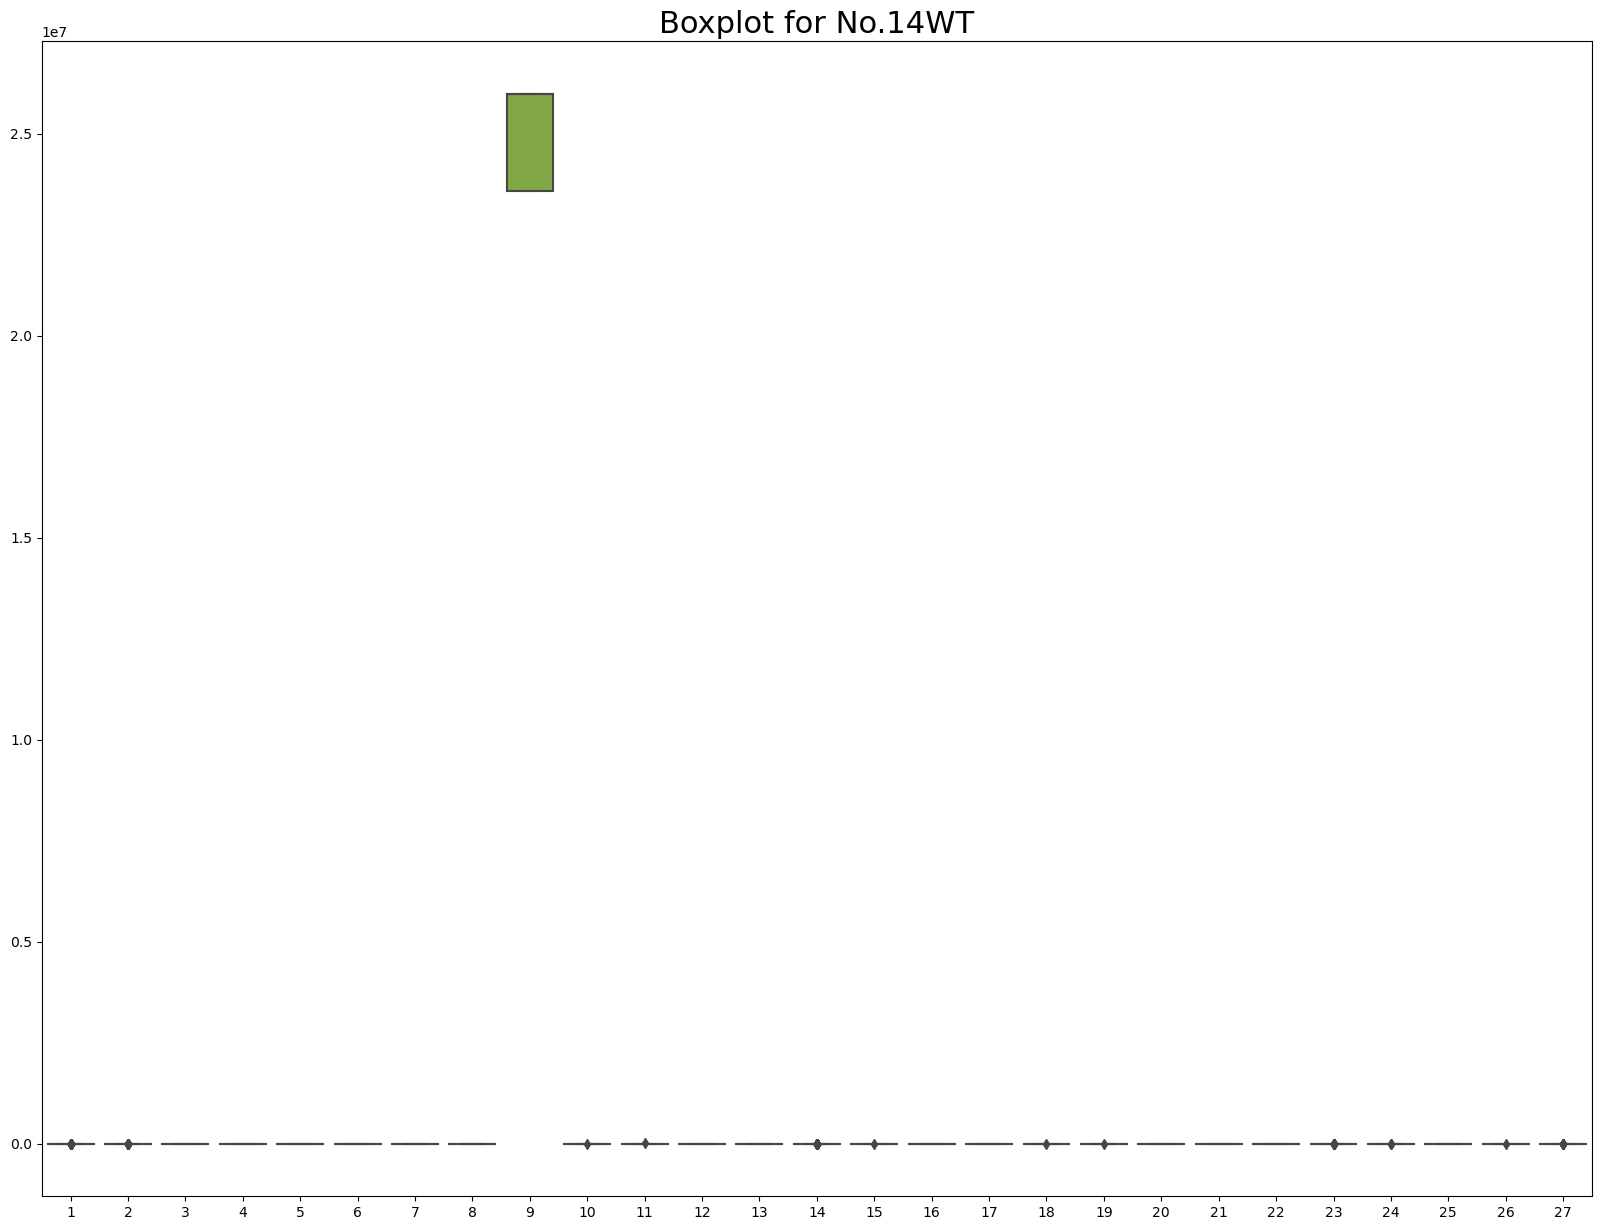

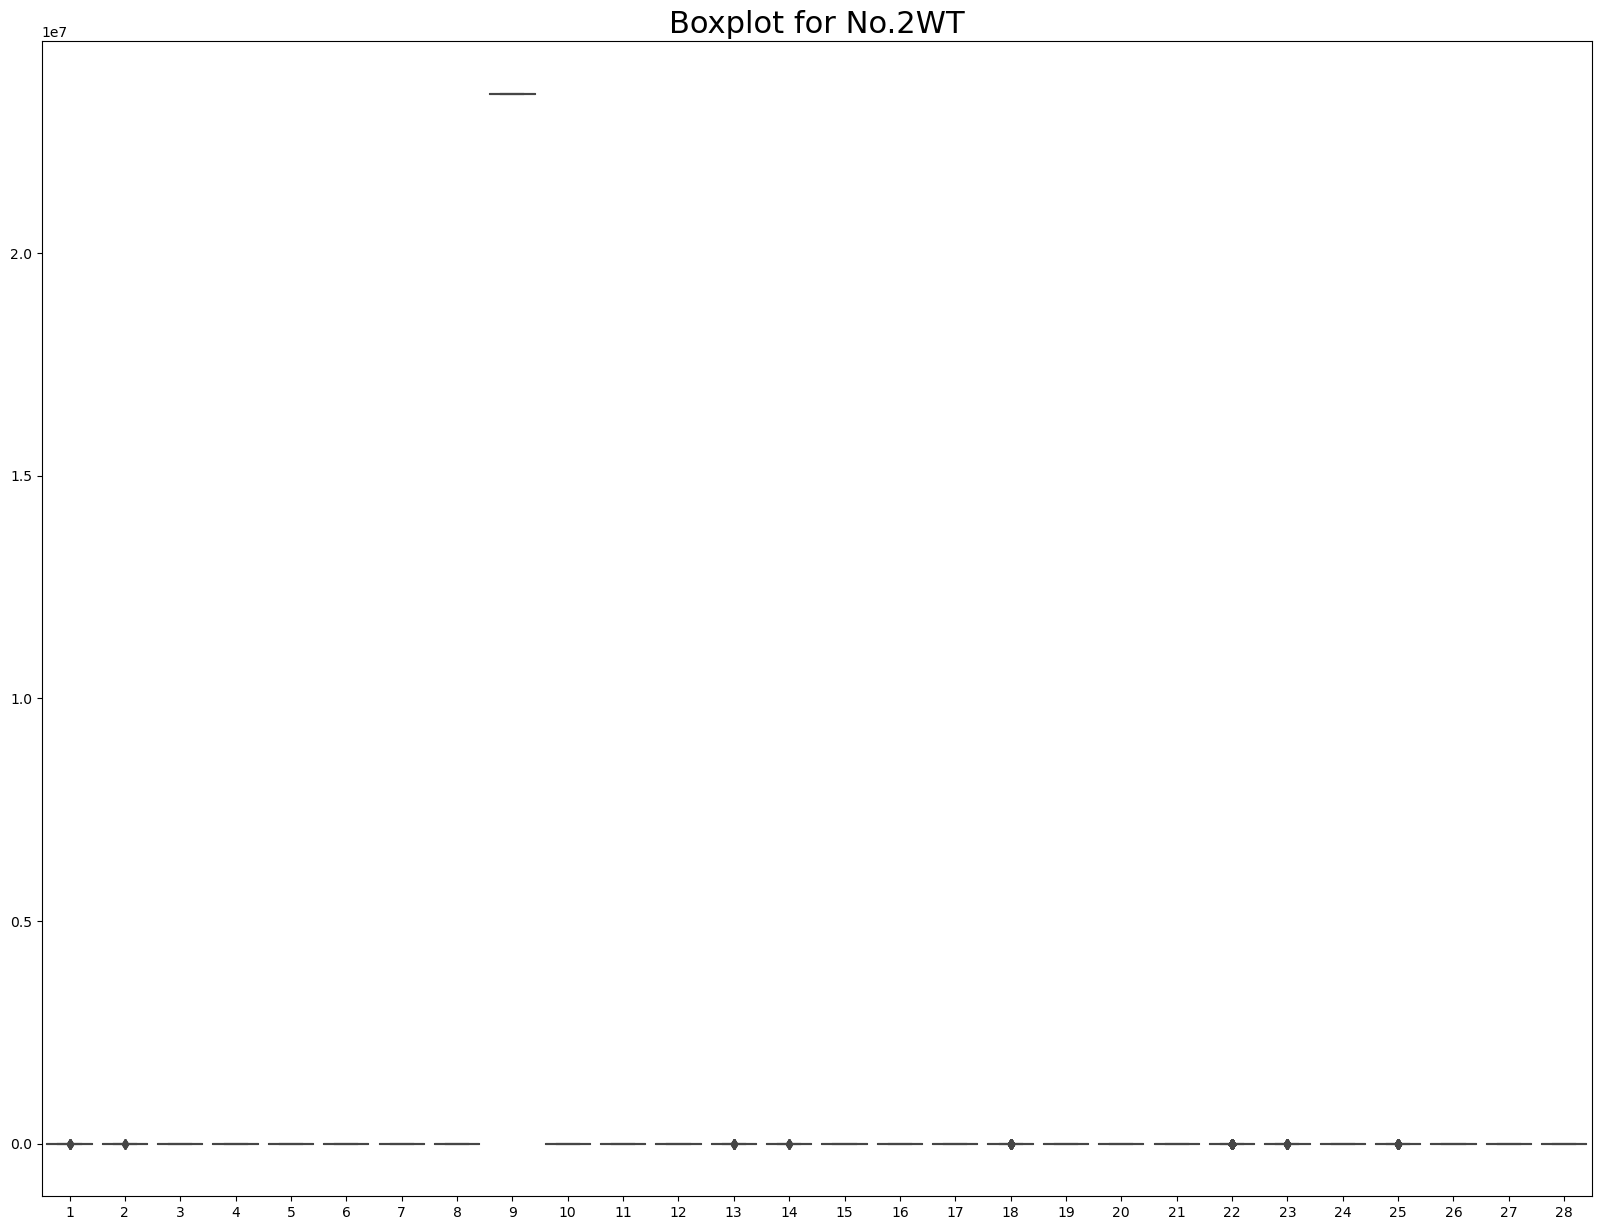

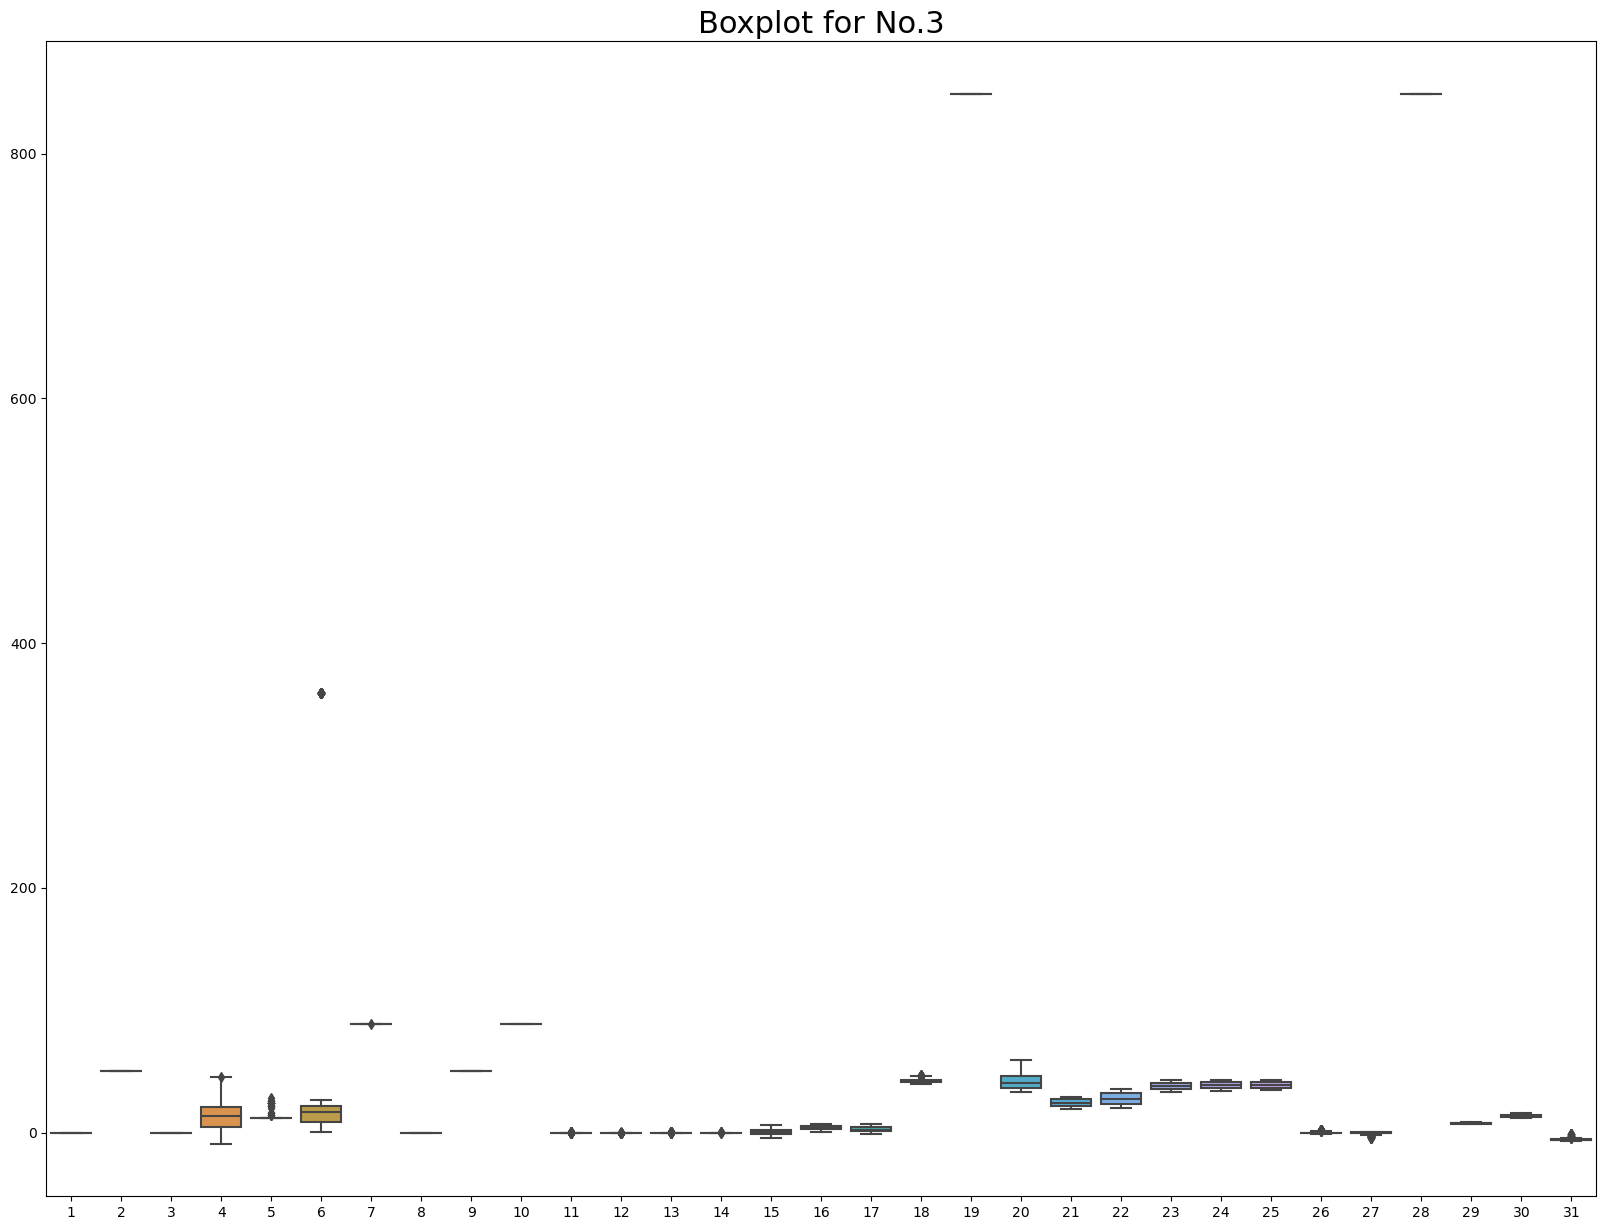

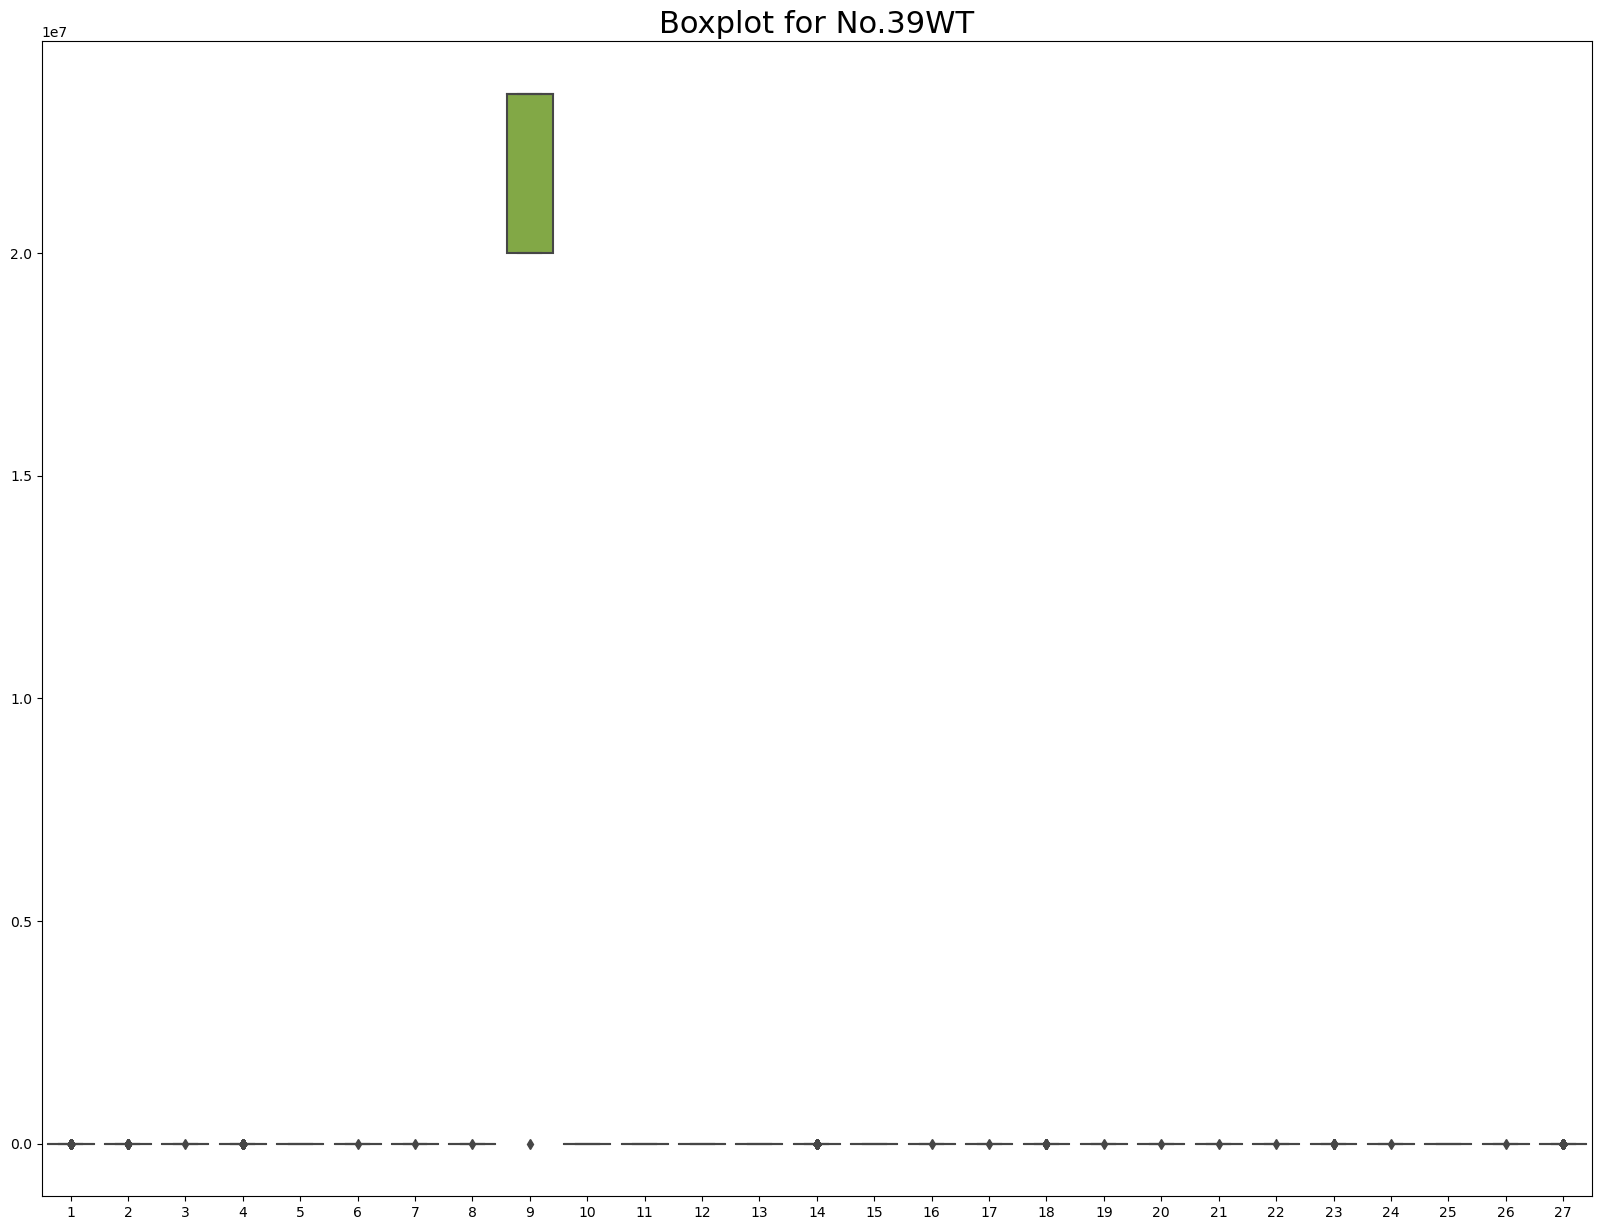

In [9]:
for name, df in zip(['No.14WT', 'No.2WT', 'No.3', 'No.39WT'], [df_no14wt, df_no2wt, df_no3, df_no39wt]):
    plt.figure(figsize=(20, 15))
    sns.boxplot(data=df)
    plt.title(f'Boxplot for {name}', fontsize=22)
    plt.show()

###### Week 3 task : Data Pretreatment

In [10]:
def analyze_sheets(sheets):
    healthy_candidate = None
    best_std_dev = float('inf')  # Start with a very high standard deviation

    for sheet_name, df in sheets.items():
        print(f"Analyzing Sheet: {sheet_name}")
        
        # Display basic statistics
        stats = df.describe()
        print(stats)
        
        # Calculate the standard deviation of each column
        std_devs = df.std()
        avg_std_dev = std_devs.mean()
        
        print(f"Average Standard Deviation for {sheet_name}: {avg_std_dev}\n")
        
        # Identify the sheet with the lowest average standard deviation
        if avg_std_dev < best_std_dev:
            best_std_dev = avg_std_dev
            healthy_candidate = sheet_name
    
    print(f"Suggested Healthy Turbine Sheet: {healthy_candidate}")


analyze_sheets(df_sheets)

Analyzing Sheet: No.2WT
                1            2            3            4            5   \
count  1570.000000  1570.000000  1570.000000  1570.000000  1570.000000   
mean     -0.007436    -0.011617    26.311611    29.280290   315.309578   
std       0.045519     0.073934     1.462201     1.631658   117.135733   
min      -0.160518    -0.238556    23.300220    25.748203    96.322975   
25%      -0.042805    -0.065061    25.000227    28.100277   198.148106   
50%      -0.010701    -0.010843    26.900213    29.800323   316.206833   
75%       0.021402     0.043374    27.600269    30.700357   425.548302   
max       0.117713     0.249400    27.700298    31.000391   516.923279   

                6            7            8             9            10  ...  \
count  1570.000000  1570.000000  1570.000000  1.570000e+03  1570.000000  ...   
mean     41.043635    40.906245    41.079840  2.357483e+07   320.622029  ...   
std       2.288937     2.238921     2.233044  3.979615e+02   117.0907

In [11]:
healthy_turbine = df_sheets['No.3']  
faulty_turbine_1 = df_sheets['No.14WT'].iloc[:20]  
faulty_turbine_2 = df_sheets['No.2WT'].iloc[:20] 
faulty_turbine_3 = df_sheets['No.39WT'].iloc[:20]  


healthy_columns = healthy_turbine.columns.tolist()  
def align_columns(faulty_df, healthy_columns):
    for col in healthy_columns:
        if col not in faulty_df.columns:
            faulty_df[col] = 0  
    return faulty_df[healthy_columns] 
faulty_turbine_1 = align_columns(faulty_turbine_1, healthy_columns)
faulty_turbine_2 = align_columns(faulty_turbine_2, healthy_columns)
faulty_turbine_3 = align_columns(faulty_turbine_3, healthy_columns)

healthy_turbine.fillna(healthy_turbine.mean(), inplace=True)
faulty_turbine_1.fillna(faulty_turbine_1.mean(), inplace=True)
faulty_turbine_2.fillna(faulty_turbine_2.mean(), inplace=True)
faulty_turbine_3.fillna(faulty_turbine_3.mean(), inplace=True)


/var/folders/tz/klyd4k_j48l5wnfqspfb04k80000gn/T/ipykernel_45082/2793699508.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faulty_df[col] = 0
/var/folders/tz/klyd4k_j48l5wnfqspfb04k80000gn/T/ipykernel_45082/2793699508.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faulty_df[col] = 0
/var/folders/tz/klyd4k_j48l5wnfqspfb04k80000gn/T/ipykernel_45082/2793699508.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [12]:
scaler = StandardScaler()
healthy_scaled = scaler.fit_transform(healthy_turbine)  
faulty_scaled_1 = scaler.transform(faulty_turbine_1)
faulty_scaled_2 = scaler.transform(faulty_turbine_2)
faulty_scaled_3 = scaler.transform(faulty_turbine_3)


pca = PCA(n_components=2)
healthy_pca = pca.fit_transform(healthy_scaled) 
faulty_pca_1 = pca.transform(faulty_scaled_1)
faulty_pca_2 = pca.transform(faulty_scaled_2)
faulty_pca_3 = pca.transform(faulty_scaled_3)

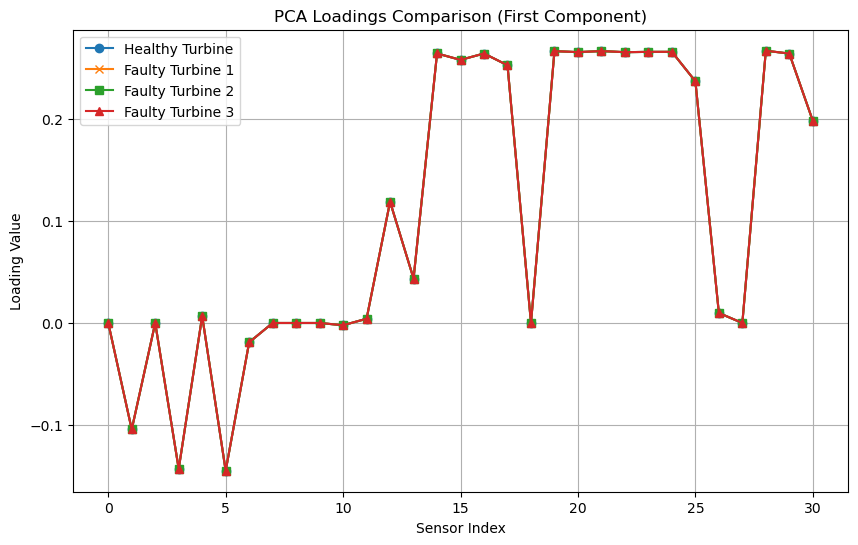

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(pca.components_[0], label='Healthy Turbine', marker='o')
plt.plot(pca.components_[0], label='Faulty Turbine 1', marker='x')
plt.plot(pca.components_[0], label='Faulty Turbine 2', marker='s')
plt.plot(pca.components_[0], label='Faulty Turbine 3', marker='^')
plt.legend()
plt.title('PCA Loadings Comparison (First Component)')
plt.xlabel('Sensor Index')
plt.ylabel('Loading Value')
plt.grid()
plt.show()

In [14]:
loading_diff_1 = pca.components_[0] - faulty_scaled_1.mean(axis=0)
loading_diff_2 = pca.components_[0] - faulty_scaled_2.mean(axis=0)
loading_diff_3 = pca.components_[0] - faulty_scaled_3.mean(axis=0)

print("Loadings Difference for Faulty Turbine 1:", loading_diff_1)
print("Loadings Difference for Faulty Turbine 2:", loading_diff_2)
print("Loadings Difference for Faulty Turbine 3:", loading_diff_3)

X_healthy = healthy_scaled[:, 2:]  
Y_healthy = healthy_scaled[:, :2] 

pls = PLSRegression(n_components=2)
pls.fit(X_healthy, Y_healthy)  

X_test = faulty_scaled_1[:, 2:]  
Y_test = faulty_scaled_1[:, :2]  
Y_pred = pls.predict(X_test)  

mae_sensor_1 = mean_absolute_error(Y_test[:, 0], Y_pred[:, 0])
mse_sensor_1 = mean_squared_error(Y_test[:, 0], Y_pred[:, 0])
mae_sensor_2 = mean_absolute_error(Y_test[:, 1], Y_pred[:, 1])
mse_sensor_2 = mean_squared_error(Y_test[:, 1], Y_pred[:, 1])

print(f"MAE for Sensor 1: {mae_sensor_1}, MSE for Sensor 1: {mse_sensor_1}")
print(f"MAE for Sensor 2: {mae_sensor_2}, MSE for Sensor 2: {mse_sensor_2}")


Loadings Difference for Faulty Turbine 1: [ 8.51928780e-03  1.65592200e+03 -7.66569000e+01 -6.16096573e+00
  6.56746782e+00 -3.07336863e-01  1.03892976e+03 -8.80955345e+01
 -2.59874770e+07  8.90000000e+01 -2.74388690e+02 -2.71612443e+03
 -3.96720175e+03  2.20948938e+00 -4.23558253e+02 -3.49519377e+00
 -2.14916621e+01 -4.85180599e+02  7.99061000e+02  1.26058356e+00
 -5.21782852e+00 -1.03138217e+00  1.66803349e+01  1.17644583e+01
 -7.43720657e+00 -1.18221652e+02 -9.83955563e+01  8.49000000e+02
  1.75240814e+01  1.25404632e+01 -7.05489593e+00]
Loadings Difference for Faulty Turbine 2: [ 3.74541775e-03  1.65647574e+03 -2.66012121e+01 -1.64423731e+00
 -1.53413661e+02  6.24738567e-02  5.30344851e+04 -4.12101778e+01
 -2.35740150e+07 -2.15504199e+02 -4.24390160e+04 -9.50462645e+04
  4.80089941e-01  1.67204443e+02 -4.23558253e+02 -1.29679550e+02
 -4.97873306e+00 -4.80180575e+02  7.98957999e+02  4.19886236e+00
  7.54540315e-01  3.83191955e+00  1.38318198e+01  1.30198423e+01
  7.40396889e+00 -7.8

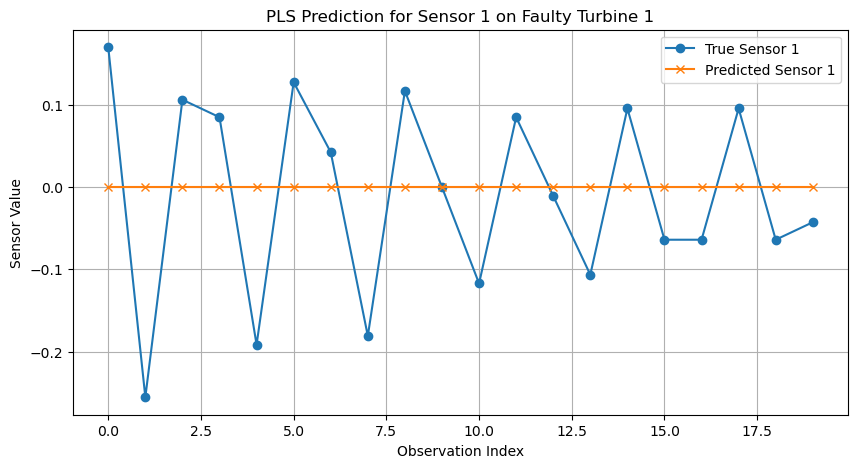

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(Y_test[:, 0], label='True Sensor 1', marker='o')
plt.plot(Y_pred[:, 0], label='Predicted Sensor 1', marker='x')
plt.legend()
plt.title('PLS Prediction for Sensor 1 on Faulty Turbine 1')
plt.xlabel('Observation Index')
plt.ylabel('Sensor Value')
plt.grid()
plt.show()


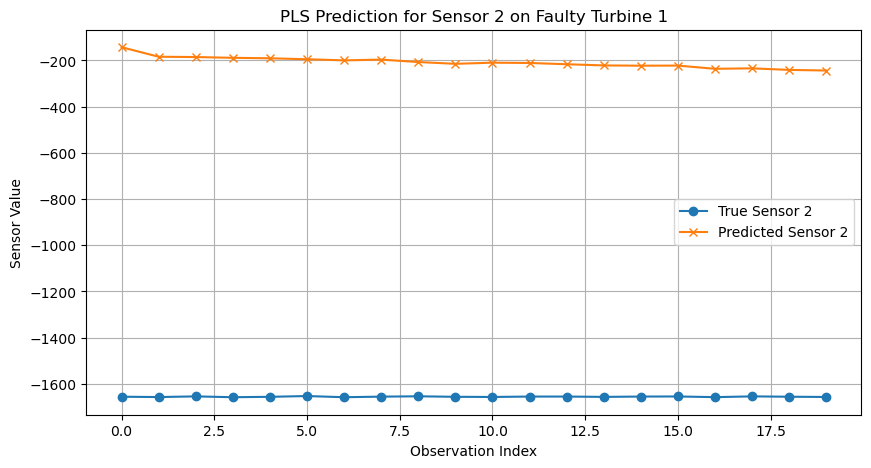

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(Y_test[:, 1], label='True Sensor 2', marker='o')
plt.plot(Y_pred[:, 1], label='Predicted Sensor 2', marker='x')
plt.legend()
plt.title('PLS Prediction for Sensor 2 on Faulty Turbine 1')
plt.xlabel('Observation Index')
plt.ylabel('Sensor Value')
plt.grid()
plt.show()
